<a href="https://colab.research.google.com/github/RecursiveOuroboros/DS-Unit-2-Sprint-2-Regression/blob/master/Copy_of_Linear_Regression_Assignment_DS3_Jason_Meil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [2]:
#y is regressand here it is target
#X is exogenions variables here they are features
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
import seaborn as sns
#Testing with some scatter plots to see what exogenic variables might affect the regressand. 
# My idea is that it is likely that Sqft, Zip, or yr_built might affect


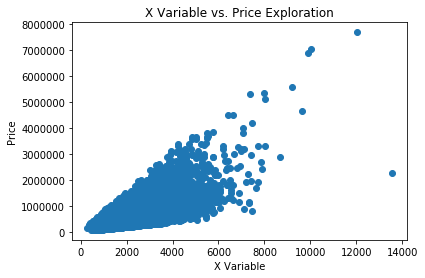

In [8]:
#Sqft vs Price
# testing some x variables on scatter plot

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df.sqft_living, df.price)
plt.ylabel("Price")
plt.xlabel("X Variable")
plt.title("X Variable vs. Price Exploration")
plt.show()

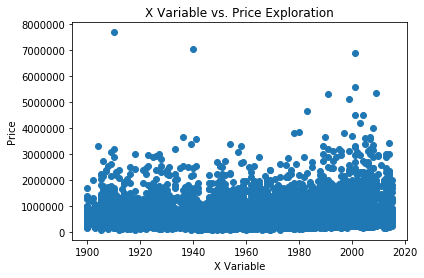

In [10]:
#yr_built vs Price
# testing some x variables on scatter plot

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df.yr_built, df.price)
plt.ylabel("Price")
plt.xlabel("X Variable")
plt.title("X Variable vs. Price Exploration")
plt.show()

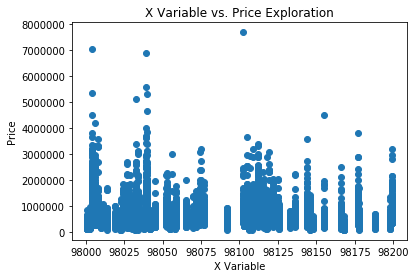

In [11]:
#zipcode vs Price
# testing some x variables on scatter plot

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df.zipcode, df.price)
plt.ylabel("Price")
plt.xlabel("X Variable")
plt.title("X Variable vs. Price Exploration")
plt.show()

In [7]:
# An alternative way I could have done this is to use a Corr matrix
df.corr()
# Sqrft_living has a .70 Correlation to Price so I think it is the best variable to start with

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [12]:
# Importing Sklearn and Using TTF on regression
#Price x sqft_living
from sklearn.model_selection import train_test_split

y = df['price']
X = df['sqft_living'].values[:, np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=.5)

print(X.shape)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21613, 1)
(10806, 1)
(10807, 1)
(10806,)
(10807,)


In [13]:
#obtaing intercepts and coefficeints 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_[0])
print("\n Intercept: ", model.intercept_)

Coefficient: 
 286.7385136874979

 Intercept:  -55565.43126924406


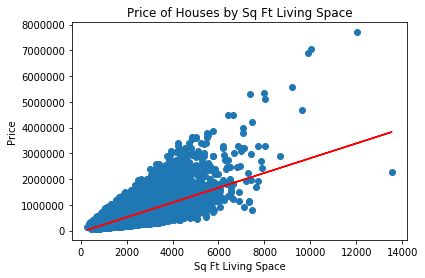

In [15]:
# Setting Observable Estimates
m_hat = model.coef_[0]
b_hat = model.intercept_

# Plot the points
plt.scatter(df.sqft_living, df.price)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat, color='r')

# Graph axes and title
plt.ylabel("Price")
plt.xlabel("Sq Ft Living Space")
plt.title("Price of Houses by Sq Ft Living Space")
plt.show()

In [17]:
# Preditction model and MSE and RMSE
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R2 is {}'.format(R2))

# R^2 is 49%, not strong for predicting housing prices

MSE is 68334576632.48577
RMSE is 261408.83044091257
R2 is 0.4816961000688855


In [0]:
# QUESTION?!?!?!!? WHy is this highest correlated to price but low R2

In [26]:
# Importing Sklearn and Using TTF on regression
#Price x yr_built
from sklearn.model_selection import train_test_split

y = df['price']
X = df['yr_built'].values[:, np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=.5)

print(X.shape)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21613, 1)
(10806, 1)
(10807, 1)
(10806,)
(10807,)


In [27]:
#obtaing intercepts and coefficeints 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_[0])
print("\n Intercept: ", model.intercept_)

Coefficient: 
 775.3723934569715

 Intercept:  -989047.2044161513


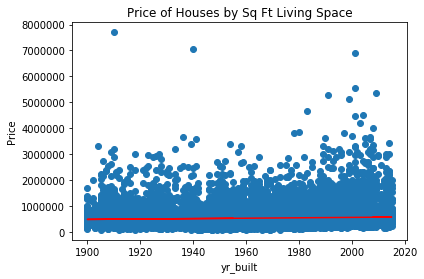

In [28]:
# Setting Observable Estimates
m_hat = model.coef_[0]
b_hat = model.intercept_

# Plot the points
plt.scatter(df.yr_built, df.price)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat, color='r')

# Graph axes and title
plt.ylabel("Price")
plt.xlabel("yr_built")
plt.title("Price of Houses by Sq Ft Living Space")
plt.show()

In [29]:
# Preditction model and MSE and RMSE
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R2 is {}'.format(R2))

# In this case R2 is significantly lower

MSE is 128547281583.2105
RMSE is 358534.9098528768
R2 is 0.0019084660088984906


In [34]:
# One more time on price but this time using a scaler
>>> from sklearn.preprocessing import StandardScaler
>>> data = [df.price, df.sqft_living]
>>> scaler = StandardScaler()
>>> print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [35]:
y = df['price']
X = df['sqft_living'].values[:, np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=.5)

print(X.shape)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21613, 1)
(10806, 1)
(10807, 1)
(10806,)
(10807,)


In [36]:
#obtaing intercepts and coefficeints 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_[0])
print("\n Intercept: ", model.intercept_)

Coefficient: 
 286.98244971590293

 Intercept:  -58615.10522903374


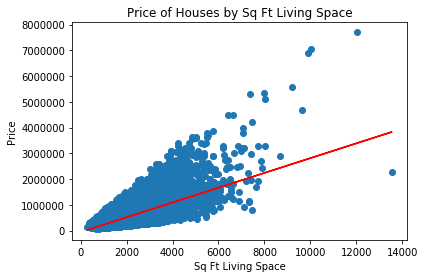

In [37]:
# Setting Observable Estimates
m_hat = model.coef_[0]
b_hat = model.intercept_

# Plot the points
plt.scatter(df.sqft_living, df.price)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat, color='r')

# Graph axes and title
plt.ylabel("Price")
plt.xlabel("Sq Ft Living Space")
plt.title("Price of Houses by Sq Ft Living Space")
plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [30]:
# Running a two variable regression on sqft_living and zipcode as exogenic predictors of regressand price
y2 = df.loc[:, ['price']].values
X2 = df.loc[:, ['sqft_living', 'bathrooms']].values

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,y2, test_size=.5, random_state=42)

print(X2.shape)

print(X2_train.shape)
print(X2_test.shape)
print(Y2_train.shape)
print(Y2_test.shape)

(21613, 2)
(10806, 2)
(10807, 2)
(10806, 1)
(10807, 1)


In [31]:
# Finding Coefficients and Intercept of new model
model2 = LinearRegression()
model2.fit(X2_train, Y2_train)

beta_0 = model2.intercept_
beta_i = model2.coef_[0]

print("Coefficient: \n", beta_i)
print("\n Intercept: ", beta_0)

Coefficient: 
 [ 267.508047   1460.38026342]

 Intercept:  [-21808.80450271]


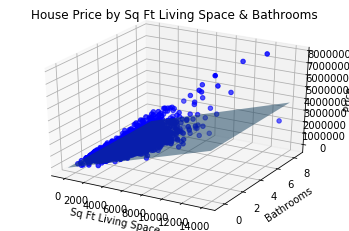

In [32]:
# Attempting to plot in R3 space the new regression
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['sqft_living'], df['bathrooms'], df['price'],c='blue')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("House Price by Sq Ft Living Space & Bathrooms")
plt.ylabel("Bathrooms")
plt.xlabel("Sq Ft Living Space")
ax.set_zlabel("Price")

plt.show()

In [33]:
# Calculating MSE, RMSE, and R2
y2_test_predict = model2.predict(X2_test)

MSE2 = mean_squared_error(Y2_test, y2_test_predict)

RMSE2 = (np.sqrt(mean_squared_error(Y2_test, y2_test_predict)))

print('MSE is {}'.format(MSE2))
print('RMSE is {}'.format(RMSE2))

R22 = r2_score(Y2_test, y2_test_predict)

print('R^2 is {}'.format(R22))

# The second variable did not change the R2 score very much even though the bathrooms have higher correlation too
# basically r2 saying that 50% is explained by 2 of the 18 variables

MSE is 75637890356.61331
RMSE is 275023.4360133938
R^2 is 0.49220036003245315


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [38]:
#Dropping price and date and id out of axis so that there is no duplicate of price and ID and Date have no fuctional exogenic value
y3 = df['price']
X3 = df.drop(columns=['price','id','date', 'zipcode'], axis=1)

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, y3, test_size=.5, random_state=42)

print(X3.shape, "\n")

print(X3_train.shape)
print(X3_test.shape)
print(Y3_train.shape)
print(Y3_test.shape)

X3_train.head()

(21613, 17) 

(10806, 17)
(10807, 17)
(10806,)
(10807,)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
493,5,2.50,2820,14062,2.0,0,0,4,7,2380,440,1960,0,47.7081,-122.215,1910,10392
4253,4,3.25,2880,35315,1.0,0,0,3,11,2270,610,1982,0,47.6587,-122.163,1910,167378
18621,5,3.50,2450,8193,2.0,0,0,3,9,2450,0,2005,0,47.7721,-122.241,2310,8193
1463,2,1.00,970,4284,1.0,0,0,3,7,970,0,1905,0,47.6667,-122.333,2050,4284
12026,3,1.75,2090,8910,1.0,0,0,3,8,1230,860,1975,0,47.7149,-122.222,2310,10695


In [39]:
# Computing the coefficient and intercept
model3 = LinearRegression()
model3.fit(X3_train, Y3_train)

print("Coefficient: \n", model3.coef_)
print("\n Intercept: ", model3.intercept_)

Coefficient: 
 [-3.23524317e+04  4.11971082e+04  9.71381572e+01  9.93397590e-02
  4.64687948e+03  5.79494688e+05  5.07277210e+04  2.90188797e+04
  1.00660649e+05  5.96991801e+01  3.74389774e+01 -2.33583954e+03
  2.27235559e+01  5.51416790e+05 -9.40896272e+04  3.20966827e+01
 -3.74793446e-01]

 Intercept:  -33835335.218613304


In [40]:
y3_test_predict = model3.predict(X3_test)

MSE3 = mean_squared_error(Y3_test, y3_test_predict)

RMSE3 = (np.sqrt(mean_squared_error(Y3_test, y3_test_predict)))

print('MSE is {}'.format(MSE3))
print('RMSE is {}'.format(RMSE3))

R23 = r2_score(Y3_test, y3_test_predict)

print('R^2 is {}'.format(R23))

# r2 is better but still not great from a predictive perspective

MSE is 47193712425.39804
RMSE is 217241.13888809836
R^2 is 0.6831621021506489


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
